# California Housing Price Prediction

> ##  Business Problem: 

To predict the prices of houses in Californa based on their different specifications and locations

> ##   Description : 

The Dataset is built using the 1990 California census data. It contains one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

The information was collected on the variables using all the block groups in California from the 1990 Census. In this sample a block group on average includes 1425.5 individuals living in a geographically compact area. Naturally, the geographical area included varies inversely with the population density. Distances were computed among the centroids of each block group as measured in latitude and longitude and all the districts reporting zero entries for the independent and dependent variables were excluded. The final data contained 20,640 observations on 9 variables. The dependent variable is ln(median house value). The other variables are as follows: 

    1. longitude: A measure of how far west a house is; a higher value is farther west
    2. latitude: A measure of how far north a house is; a higher value is farther north
    3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
    4. totalRooms: Total number of rooms within a block
    5. totalBedrooms: Total number of bedrooms within a block
    6. population: Total number of people residing within a block
    7. households: Total number of households, a group of people residing within a home unit, for a block
    8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
    9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
    10. oceanProximity: Location of the house w.r.t ocean/sea

> ## Approach : 

You will understand the data and make the best model in the following stages : 

- **Data Description**

- **Exploratory Data Analysis**
         
      - Uni-Variate Analysis : Boxplot , Histogram , Barplot
      - Correlation Analysis : Correlation Matrix
      - Bi-Variate Analysis : Scatter Matrix and Plot
      - Multi-Variate Analysis : Scatter Plot
      
- **Data Cleaning and Manipulation**
    
      - Attribute Combination
      - OneHotEncoding Categorical Attributes
      - Missing Values Handling

- **Data Sampling and Splitting**
     
      - Stratified Sampling : Implementation and Comparison
      - Train-Validation-Test Splitting

- **Modelling and CrossValidating**

      - Linear Regression 
      - Decision Tree 
      - Random Forest 

- **HyperTuning : GridSearch** 
- **Test Set Evaluation**
- **Conclusion** 

## `1` Data Description

In [2]:
#importing Libraries
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# loading data
data_path = 'C:/Users/kusht/OneDrive/Desktop/Excel-csv/housing.csv'
housing = pd.read_csv(data_path)


**TASK : Get info about the dataset using `info()`**

In [4]:
### START CODE HERE (~ 1 Line of code)
housing.info()
### END CODE

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**TASK : Fill the information we get from `info()`**
- total observations: `20640`  (Each observation is the data about a block group)
- total columns (features): `10`
- data type of each feature: `9` numberical and `1` object 
- features with null values : `total_bedrooms has only 20433 non-null values` 

**TASK : Output the first five instances of the dataset and analyse**

In [5]:
### START CODE HERE (~1 Line of code)
housing.head()
### END CODE

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


`describe()` shows a summary of <b>numerial features</b> , which can be visualized using boxplots and histograms. `value_counts()` can be used to generate a summary of <b>categorical features</b>.

**TASK : Describe the dataset**

In [6]:
### START CODE HERE (~ 1 Line of code)
housing.describe()
### END CODE

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## `2` Exploratory Data Analysis

### `2.1` Uni-Variate Analysis

**TASK : Make a `Boxplot` of `median_house_value`**

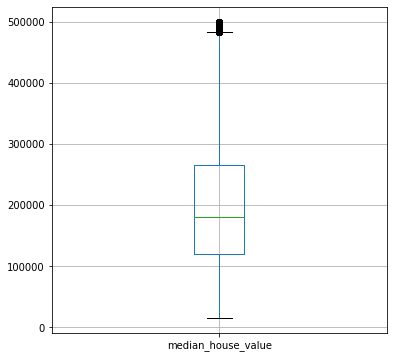

In [7]:
### Create BOXPLOT using boxplot() and keep figsize=(6,6)

### START CODE HERE : (~ 1 Line of code)
housing.boxplot('median_house_value' , figsize=(6,6))
### END CODE HERE

**TASK : Now make `histograms` of all of the Numerical Attributes**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D8C2FF4C48>,
      dtype=object)

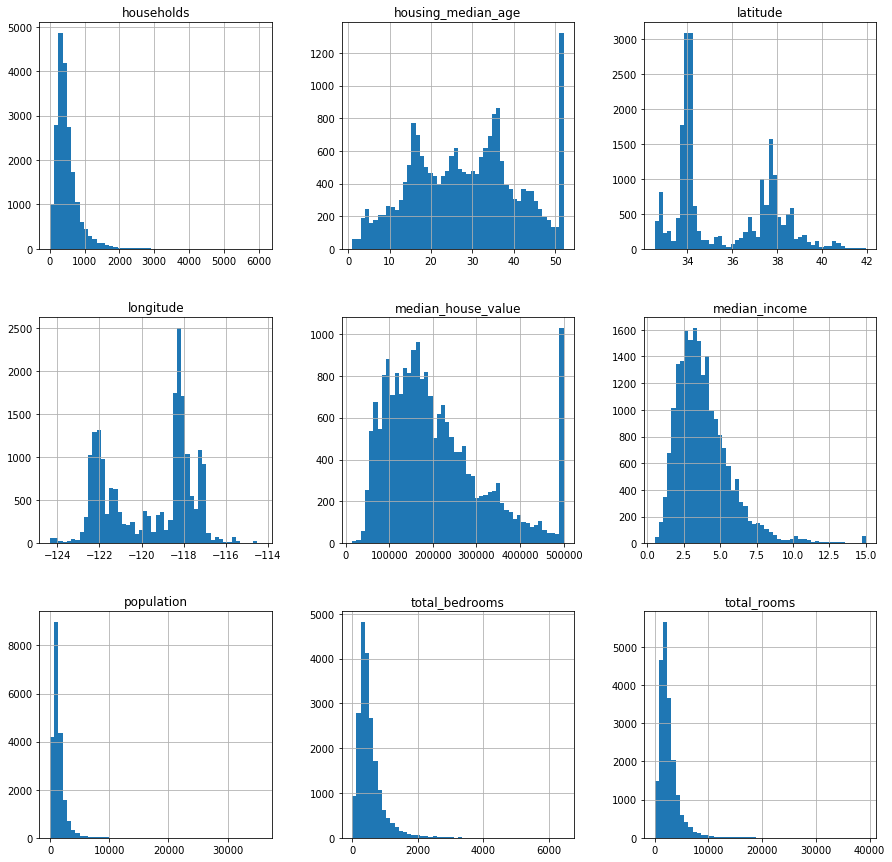

In [8]:
# Create histograms of all attributes in one line using hist() function and keep figsize=(15,15)

### START CODE HERE : (~1 Line of code)
housing.hist(figsize=(15,15),bins=50)
### END CODE


Given that `.boxplot()` and `.hist()` only handle numerical features. You have to use other technique to visualise categorical attributes like `ocean_proximity`, which is object type 

One idea is to plot a bar graph between elements names/labels and their respective counts/frequencies . The frequencies can be found out using `value_counts()` method and a barplot can be plotted between indexes and values of the categorical attributes value_counts

**Task : Find value counts of the categorical attribute and store it in a variable `op_count`**

In [9]:
### START CODE HERE (~ 1 Line of code)
op_count=housing.ocean_proximity.value_counts()
### END CODE

**TASK : Plot a `bar graph` between op_count indexes and op_count values**

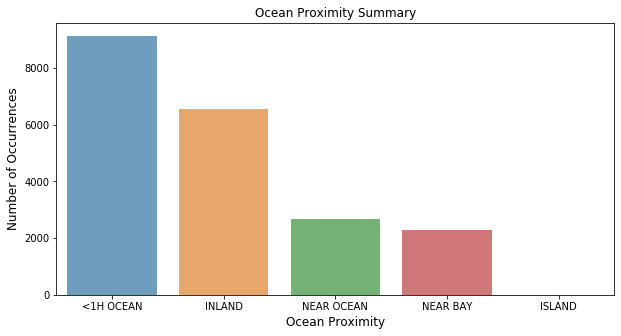

In [10]:
### Parameters: figsize=(10,5) , alpha= 0.7 , fontsize=12 for x and y labels

### START CODE HERE (FULL CODE)
plt.figure(figsize=(10,5))
sns.barplot(op_count.index, op_count.values, alpha=0.7)
plt.title('Ocean Proximity Summary')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Ocean Proximity', fontsize=12)
plt.show()
### END CODE

#### Understand and Analyse The Data
1. Make sense of the data

      - **Why are total rooms and bedrooms in hunderds or thousands?** 
          Answer : This is because dataset is considering each instance as a block group , definition of which has been explained above
      - **Is population in thousands or millions or just the number of people living in that block?** 
          Answer : Its the number of people living in that block group
      - **Why does median income value is so low? is it already scaled?** 
         Answer : Its already scaled with maximum value 15 
 

2. **Feature Scaling** : Is it required? 

**Answer** : It can be done but the algorithms we're training doesnt require feature scaling. only algorithms pertaining to distance like SVM gets affected by feature scaling
 
3. **Distribution** : from the histograms what can you infer , is the data skewed or normal? 

**Answer** : Most of the data is skewed but boxcox transformation or any other normalising transformation wont be used in this notebook , however you can try and make a new normalised model and judge its characterstics 

### `2.2`  Correlation Analysis
Further
explore the data to look for correlations between different attributes. correlation coefficient is between -1 and 1, representing negative and positive correlations. 0 means there is no liner correlation. Correlation is said to be linear if the **ratio of change** is constant, otherwise is non-linear. 

**TASK : Print the `Correlation Matrix` and make it more visually appealing using `sns.heatmap`**

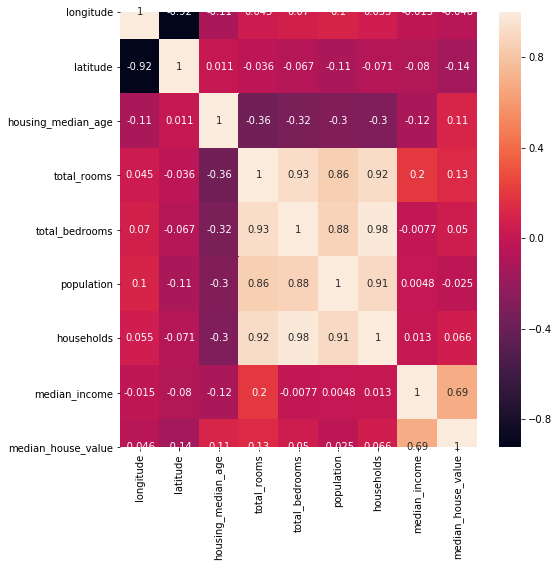

In [11]:
### START CODE HERE (FULL CODE)
plt.subplots(figsize=(8,8))
sns.heatmap(housing.corr(),annot=True)
### END CODE

### `2.3` Bi-Variate Analysis

**Scatter matrix gives a good idea about histograms of each attribute and their dependencies on each other through scatter plots between each pair**

**TASK : Plot a `scatter matrix`**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D8C3AA4C48>,
      dtype=object)

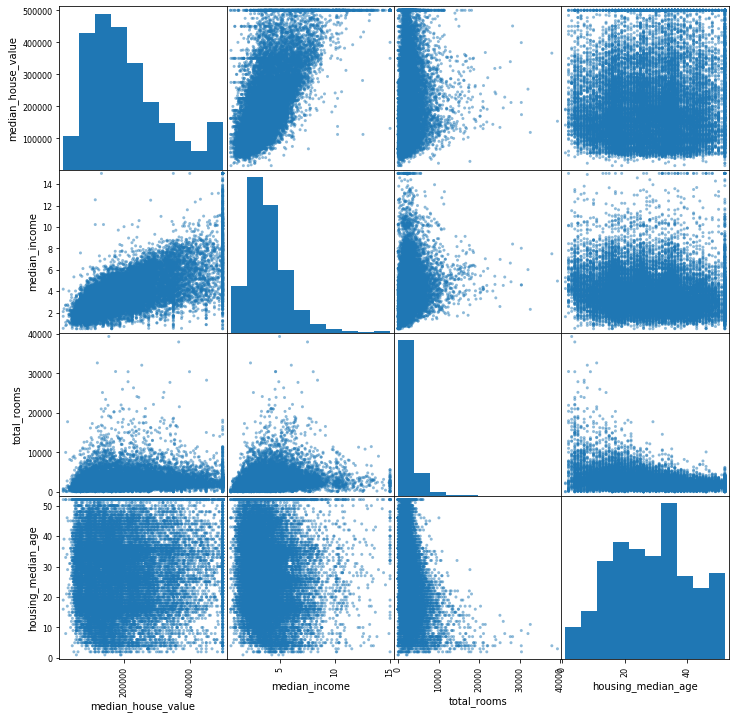

In [12]:
from pandas.plotting import scatter_matrix
### Plot scatter matrix only of attrbutes : 'median_house_value', 'median_income', 'total_rooms', 'housing_median_age'
### Keep figsize = (12,12)

### START CODE HERE 
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,12))
### END CODE

Analyse the promising attributes by seeing which forms the closest linear plot and judging values of correlation matrix with respect to `median_house_value`

 **Note** that in scatter plots , like between `median_income` and `median_house_value` , there are many horizontal lines which are abrupting the linearity between the two attributes . 
**Think of a reason for this and you can remove them which might help in better model**

**TASK : Plot an individual scatter plot between `median_income` and `median_house_value` to understand the problem better**

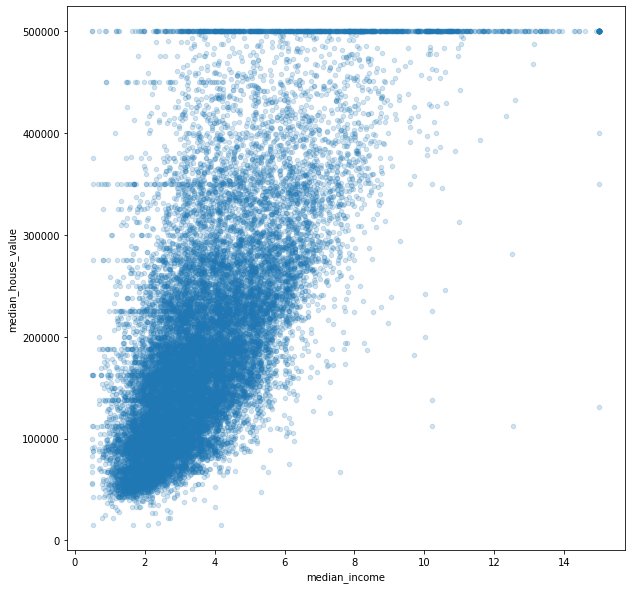

In [13]:
### Keep figsize=(10,10) and alpha=0.2

### START CODE HERE (FULL CODE)
housing.plot(kind='scatter' , x='median_income' , y='median_house_value' , alpha=0.2 , figsize=(10,10))
### END CODE

**TASK (Optional but effective) : Remove the duplicate values of `median_house_value`** 

> **HINT 1** : Try to set a criterion for removing , like removing instances if their number of duplicates are greater than 20 or any number of your choice. you can use value_counts to see which threshold number would be better. This way information of attributes will be retained as there are still 20 duplicates and yet plot would be more linear as again , there's only 20 duplicates. 

> **HINT 2 (Basic Approach)** : You can find all the instances in `median_house_value` having duplicates >20 using `duplicated()` and `value_counts()` and then remove those instances

In [ ]:
### You can use as many functions , variables and for loops you want but try to find the most optimum code

### START CODE HERE ( FULL CODE )

dup_val=housing.median_house_value.value_counts()
housing.median_house_value=housing.median_house_value.apply(lambda x : np.nan if dup_val[x]>20 else x)
housing.dropna(subset=['median_house_value'],inplace=True)

### END CODE

> **TASK (Optional) : Plot the scatter plot and compare the results with previous plot** 

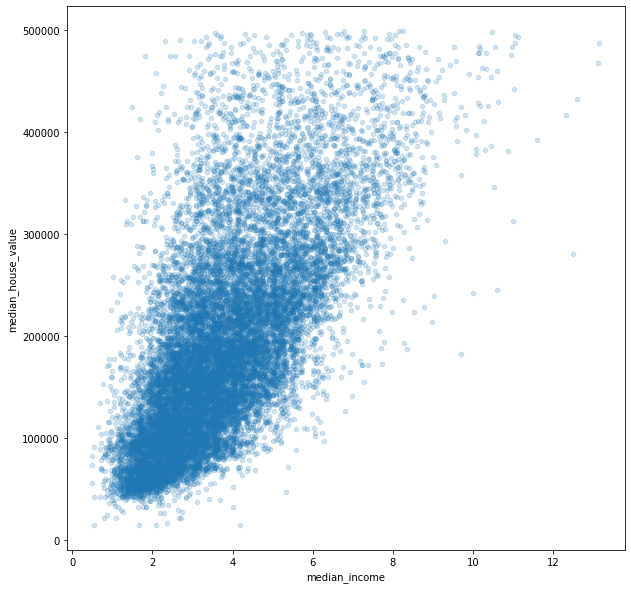

In [31]:
### START CODE HERE : 
housing.plot(kind='scatter' , x='median_income' , y='median_house_value' , alpha=0.2 , figsize=(10,10))
### FULL CODE 

**Clearly it has been a useful exercise now the data looks more correlated**

### `2.4` Multi-Variate Analysis

To get to know the shape and see your dataset covers mostly all parts of california , a scatter plot of latitude and longitude can be especially important to know the densities at each point in california

**TASK : Plot a scatter plot between `Latitude` and `Longitude` and analyse**

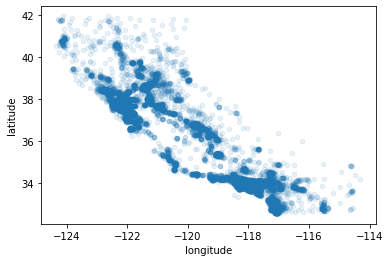

In [32]:
### Use alpha = 0.1 

### START CODE HERE : (~ 1 Line of code)
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)
### END CODE HERE

**Does it look liek the map of California?**

<img src="https://ca-at.org/wp-content/uploads/2016/04/County-Map-Colored.jpg">

To extract more information from it you can also plot a `Multi-Variate Scatter plot` with size as the `housing population` and color as `meidan_house_Value`

**TASK : Extract more information from scatter plot by plotting `latitude` , `longitude` , `median_house_value` and `population` in the same scatter plot**

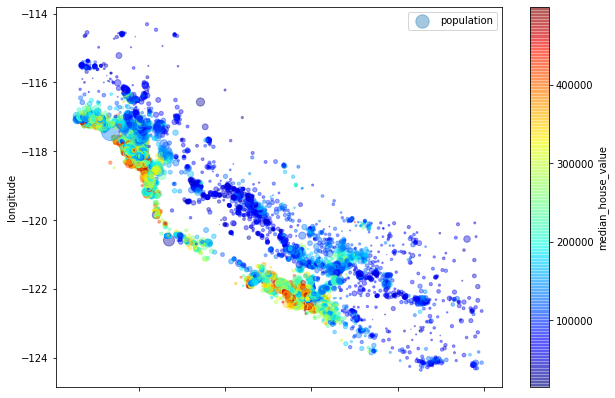

In [33]:
#  s: radius of each circle represent the housing.population/100
#  c: Put meidan_house_value as the color scheme

### START CODE HERE : (WRITE CODE WHERE '#' IS GIVEN)

housing.plot(kind='scatter' , x='latitude', y='longitude', alpha=0.4, 
    s=housing["population"]/100, label='population', figsize=(10,7), 
    c='median_house_value' , cmap=plt.get_cmap('jet'), colorbar=True)

### END CODE HERE

You can also extract more information in the same way using `s` and `c` parameters as different attributes like ocean_proximity etc to get more insight about the data . 

**This completes your visualisation and one should always analyse the graphs to get a better understanding of how and what type of model to build or data to manipulate to get best results**

## `3` Data Cleaning and Manipulation 

In this section you have to clean the data and make new chnages/manipulations before models are build on it 

### `3.1` Attribute Combinations
While total rooms and bedrooms might not be that useful however a combination of attributes can help to create a much more meaningful attribute for eg : 

- rooms per household
- bedroom/total room ratio
- population per household

These are just a few , you can think of more such attributes

**TASK : Create new attributes by combining previous ones and check out correlation again**

In [39]:
### You can create any choice of new attrbute but it should make sense
### For now lets stick to the new attribute cominations that are mentioned above

### START CODE HERE : (WRITE CODE WHERE '#' IS GIVEN)

# Calculated attributes : 

housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

### END CODE

**TASK : Analyse the new attributes correlations with others and judge if it was a good decision to form these attributes**

In [40]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.680079
rooms_per_household         0.153992
total_rooms                 0.145302
households                  0.089654
total_bedrooms              0.068873
housing_median_age          0.062399
population                  0.007062
longitude                  -0.045445
latitude                   -0.155578
population_per_household   -0.194984
bedrooms_per_room          -0.280018
Name: median_house_value, dtype: float64

### `3.2` Text and Categorial Attributes
Most ML algorithms and visualisations work with numbers better. Therefore, you need to convert text attributes into numerical attributes. 


**TASK : Convert categorical attribute to numerical attribute**

You can use LabelEncoder() , Binarizer() , OneHotEncode() or get_dummies whichever seems the mose convenient to you. Decide and analyse whether its safe to just label encode it or does it require one hot encoding then encode it via any of the functions method above

In [44]:
### START CODE HERE : (FULL CODE)
ocean_cat=pd.get_dummies(housing.ocean_proximity)
housing[ocean_cat.columns]=ocean_cat
housing.drop('ocean_proximity' ,axis=1,inplace=True)
### END CODE HERE

### `3.3` Missing Values 

Now missing values in some attributes need to be handled

**TASK : Use `info()` method to know which attributes has missing values**

In [48]:
### START CODE HERE (~1 Line of code)
housing.info()
### END CODE

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17690 entries, 0 to 20639
Data columns (total 17 columns):
longitude                   17690 non-null float64
latitude                    17690 non-null float64
housing_median_age          17690 non-null float64
total_rooms                 17690 non-null float64
total_bedrooms              17506 non-null float64
population                  17690 non-null float64
households                  17690 non-null float64
median_income               17690 non-null float64
median_house_value          17690 non-null float64
rooms_per_household         17690 non-null float64
bedrooms_per_room           17506 non-null float64
population_per_household    17690 non-null float64
<1H OCEAN                   17690 non-null uint8
INLAND                      17690 non-null uint8
ISLAND                      17690 non-null uint8
NEAR BAY                    17690 non-null uint8
NEAR OCEAN                  17690 non-null uint8
dtypes: float64(12), uint8(5)
memo

**TASK : Use `fillna()` method to fill the missing values with `mean` and check `info()` again for confirmation**

In [49]:
### START CODE HERE 

housing.fillna(strategy='mean',inplace=True)
housing.info()

### END CODE 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17690 entries, 0 to 20639
Data columns (total 17 columns):
longitude                   17690 non-null float64
latitude                    17690 non-null float64
housing_median_age          17690 non-null float64
total_rooms                 17690 non-null float64
total_bedrooms              17690 non-null object
population                  17690 non-null float64
households                  17690 non-null float64
median_income               17690 non-null float64
median_house_value          17690 non-null float64
rooms_per_household         17690 non-null float64
bedrooms_per_room           17690 non-null object
population_per_household    17690 non-null float64
<1H OCEAN                   17690 non-null uint8
INLAND                      17690 non-null uint8
ISLAND                      17690 non-null uint8
NEAR BAY                    17690 non-null uint8
NEAR OCEAN                  17690 non-null uint8
dtypes: float64(10), object(2), uint

## `4` Data Sampling and Splitting

This section would guide you to choose the best option of sampling seeing the dataset and then implementing it by creating training , validation and test sets

### `4.1` Stratified Sampling

In statistics, stratified sampling is a method of sampling from a population which can be partitioned into subpopulations.
An exmaple to explain better would be to assume that we need to estimate the average number of votes for each candidate in an election. Assume that a country has 3 towns: Town A has 1 million factory workers, Town B has 2 million office workers and Town C has 3 million retirees. We can choose to get a random sample of size 60 over the entire population but there is some chance that the resulting random sample is poorly balanced across these towns and hence is biased, causing a significant error in estimation. Instead if we choose to take a random sample of 10, 20 and 30 from Town A, B and C respectively, then we can produce a smaller error in estimation for the same total sample size. This method is generally used when a population is not a homogeneous group.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Stratified_sampling.PNG/220px-Stratified_sampling.PNG">

<img src="https://www.researchgate.net/profile/Stefano_Ferilli/publication/216799623/figure/fig3/AS:650409278468108@1532081064594/Stratified-sampling-methodology.png">

First understand why straitified sampling is crucial here and then analyse which attribute you can base your sampling on.

> A good option would be to stratify sample it on basis of `income` . Lets try it out 

**TASK : Stratify sample on basis of `median_income`** 

You can see the documentation and examples of stratified sampling [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html)

limit the number of categories by dividing the median income by 1.5 and merge all the income greater than 5 into 5. Then, you can use stratified sampling. This is done to create bins and small range for sampling

> **Task : Use `np.ceil` to create bins and divide `median_income` by 1.5 to create small convenient range**

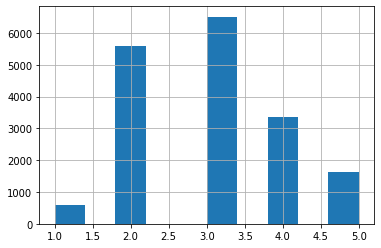

In [50]:
### START CODE HERE
housing['income_cat'] = np.ceil(housing['median_income']/1.5)

# Merge value greater than 5 to 5 in the same variable 'income_cat'
# Print a histogram of 'income_cat' to see the distribution 

housing['income_cat'].where(housing['income_cat']<5, 5.0, inplace=True)
housing['income_cat'].hist()

### END CODE

> **Task : Create an object `split` of `StratifiedShuffleSplit()` and use it to create Stratified train and test sets**

In [51]:
# stratified sampling based on income categories
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [52]:
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

strat_test_set.head(10)

C:\Users\kusht\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  
C:\Users\kusht\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_cat
15196,-117.09,32.91,9.0,2012.0,316,802.0,289.0,6.5706,255700.0,6.961938,0.157058,2.775087,1.0,0.0,0.0,0.0,0.0,5.0
14978,-116.99,32.71,21.0,3049.0,582,2355.0,585.0,3.8904,113800.0,5.211966,0.190882,4.025641,0.0,0.0,0.0,0.0,1.0,3.0
13308,-117.61,34.08,20.0,3550.0,736,2229.0,681.0,3.0199,128800.0,5.212922,0.207324,3.273128,0.0,1.0,0.0,0.0,0.0,3.0
4114,-118.41,34.14,33.0,778.0,143,258.0,130.0,5.7380,497600.0,5.984615,0.183805,1.984615,1.0,0.0,0.0,0.0,0.0,4.0
14135,-117.07,32.75,9.0,3464.0,749,1687.0,645.0,3.3026,119100.0,5.370543,0.216224,2.615504,0.0,0.0,0.0,0.0,1.0,3.0
5732,-118.19,34.16,49.0,1788.0,267,735.0,266.0,6.6009,375700.0,6.721805,0.149329,2.763158,1.0,0.0,0.0,0.0,0.0,5.0
9967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1363,-122.14,38.02,44.0,1625.0,432,825.0,385.0,2.0523,133900.0,4.220779,0.265846,2.142857,0.0,0.0,0.0,1.0,0.0,2.0
722,-122.10,37.68,38.0,1779.0,413,1061.0,400.0,3.0962,180900.0,4.447500,0.232153,2.652500,0.0,0.0,0.0,1.0,0.0,3.0
16521,-121.21,37.80,33.0,1862.0,429,971.0,389.0,2.6053,99200.0,4.786632,0.230397,2.496144,0.0,1.0,0.0,0.0,0.0,2.0


stratified sampling's distributions are much more similar to the overall distributions compared with random sampling

In [53]:
housing['income_cat'].value_counts() / len(housing)

3.0    0.368231
2.0    0.315546
4.0    0.189994
5.0    0.092708
1.0    0.033522
Name: income_cat, dtype: float64

In [54]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3.0    0.311193
2.0    0.272188
4.0    0.156868
5.0    0.084511
1.0    0.026851
Name: income_cat, dtype: float64

In [55]:
# we need to do the random sampling again to include income_cat column
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

test_set['income_cat'].value_counts() / len(test_set)

3.0    0.362917
2.0    0.311193
4.0    0.193047
5.0    0.098643
1.0    0.034200
Name: income_cat, dtype: float64

**TASK : Remove the income_cat variable**

In [56]:
# drop the income_cat attributes
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

### `4.2`  Create training and validation sets

**TASK : Split your `current training set` into dependent and independent variables and name them y and X respectively**

In [58]:
y=strat_train_set.median_house_value
X=strat_train_set.drop('median_house_value' ,axis=1)

**TASK : Use `train_test_split` to split the X and y into X_train , X_val , y_train , y_val**

In [62]:
### Keep the test_size=0.2 and random_state=42
from sklearn.model_selection import train_test_split
### START CODE HERE (FULL CODE)
X_train , X_val ,y_train ,y_val = train_test_split(X,y,test_size=0.2 ,random_state=42)
### END CODE

### Linear Regression : 

In [73]:
for i in (X_train, X_val, y_train, y_val) : 
    i.dropna(inplace=True)

C:\Users\kusht\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [109]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)  # housing_prepared are independent variables and housing_labels are dependent variables

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [117]:
from sklearn.metrics import mean_squared_error
y_pred = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train,y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

57365.30435348104

In [118]:
y_train.describe()

count      9719.000000
mean     193365.387077
std       97331.822748
min       14999.000000
25%      117850.000000
50%      174800.000000
75%      247850.000000
max      499000.000000
Name: median_house_value, dtype: float64

25% and 75% quantile are `$117850`  and  `$247850` respectively, which means 50% of the house prices are between those two values. Therefore, $57,365 error is not very good, which is a typical example of **underfitting**.

### Decision Tree :

A decision tree can be used to visually and explicitly represent decisions and decision making. As the name goes, it uses a tree-like model of decisions. It chooses a path based on the decisions and ultimately ends in a classification or regression figure. It can be understood better with a diagram : 

<img src="https://dimensionless.in/wp-content/uploads/2018/11/Picture1-1.png">

Regression trees are represented in the same manner, just they predict continuous values like price of a house.

**TASK : Use built in libaries to implement `Decision Trees` , fit it on the training set and print the `RMSE` values on the training set predictions**

In [119]:
# Try Decision Tree
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)
y_pred = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train,y_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

**Does this mean `Decision Trees` gives the best model?**

### Cross Validation

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

The general procedure is as follows:

    1. Shuffle the dataset randomly.
    2. Split the dataset into k groups
    3. For each unique group:
        
        - Take the group as a hold out or test data set
        - Take the remaining groups as a training data set
        - Fit a model on the training set and evaluate it on the test set
        - Retain the evaluation score and discard the model

    4. Summarize the skill of the model using the sample of model evaluation scores

Importantly, each observation in the data sample is assigned to an individual group and stays in that group for the duration of the procedure. This means that each sample is given the opportunity to be used in the hold out set 1 time and used to train the model k-1 times.

**TASK : Get `Mean RMSE` cross validation scores for `Decision Tree` and `Linear Regression Model`**

In [120]:
# 10-fold cross validation
from sklearn.model_selection import cross_val_score

# for decision tree
tree_scores = cross_val_score(tree_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)

# for linear regression
lin_scores = cross_val_score(lin_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [122]:
print('Scores:', tree_rmse_scores)

Scores: [59209.24828356 67602.57358223 60338.17003667 61041.19670741
 60856.7873779  59410.50538763 60015.0785237  63415.483839
 56595.64712646 64733.93696712]


In [123]:
print('Mean:', tree_rmse_scores.mean())

Mean: 61321.86278316828


In [124]:
print('Standard Deviation:', tree_rmse_scores.std())

Standard Deviation: 2981.5562069787884


In [125]:
print('Scores:', lin_rmse_scores)

Scores: [54716.38836674 56922.91692026 58154.60337492 58532.50312301
 56094.53217801 56346.09797003 59322.27070838 80647.53228249
 53865.20954081 55433.44703197]


In [126]:
print('Mean:', lin_rmse_scores.mean())

Mean: 59003.55014966205


In [127]:
print('Standard Deviation:', lin_rmse_scores.std())

Standard Deviation: 7395.184583271119


###### Now, Decision Tree Model's performance is actually worse than the Linear Regression Model: mean rmse 61321 vs. 59003 (the numbers differ everytime you run the models)

### Random Forest

Since you already have an idea baout Decision Trees , It's easier to understand `Random Forest` . Random forest, like its name implies, consists of a large number of individual decision trees that operate as an [ensemble](https://en.wikipedia.org/wiki/Ensemble_learning) . Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction. 

<img src="https://miro.medium.com/max/1000/1*VHDtVaDPNepRglIAv72BFg.jpeg"> 

The fundamental concept is  large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models. Since this dataset has very low correlation between attributes , random forest can be a good option. 

**TASK : Implement `Random Forest` from built in Libraries , fit on training set and print `Mean RMSE Cross Validation` score**

In [128]:
# Try Random Forest, which is an Ensemble Learning model
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

forest_scores = cross_val_score(forest_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
print('Mean:', forest_rmse_scores.mean())

C:\Users\kusht\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Mean: 45736.911909991584


Random Forest is much better that the previous models. 


## `6` HyperTuning

Once you've chosen the best model , look for its documentation , see its parameters and make an appropriate `param_grid` and then do a GridSearch to find the best combinations of parameters.

In this section you'll learn how to implement hypertuning of random forest model's parameters and you can hypertune other models based on that  

#### Random Forest Hypertuning : GridSearch

Grid-search is used to find the optimal hyperparameters of a model which results in the most ‘accurate’ predictions. It builds a model for every combination of hyperparameters specified and evaluates each model. A more efficient technique for hyperparameter tuning is the Randomized search — where random combinations of the hyperparameters are used to find the best solution. However , if its a small sample like the current dataset then gridsearch is also fine. 

**TASK : Form param_grid and do a `GridSearch` to print the best parameters for `Random Forest` model** 

In [129]:
# use GridSearch to find best hyperparameter combinations
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[3, 10, 30], 'max_features': [2, 4, 6, 8]},  # try 3x4=12 combinations
    {'bootstrap': [False], 'n_estimators':[3, 10], 'max_features': [2, 3, 4]},  # try 2x3=6 combinations
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')  # each model is trained 5 times, so (12+6)*5 = 90 rounds of training in total
grid_search.fit(X_train , y_train)
grid_search.best_params_  # best parameters

{'max_features': 8, 'n_estimators': 30}

In [130]:
grid_search.best_estimator_  # best estimators

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [131]:
# The importance of the features
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([9.21128511e-02, 6.50935745e-02, 3.96158894e-02, 1.80565404e-02,
       1.57367642e-02, 1.58033259e-02, 1.50407792e-02, 3.27680548e-01,
       3.74421783e-02, 8.48943568e-02, 1.09694876e-01, 8.87537918e-03,
       1.61696702e-01, 1.69408085e-04, 2.38136653e-03, 5.70546024e-03])

In [132]:
attributes=housing.columns
sorted(zip(feature_importances, attributes), reverse=True)

[(0.32768054807587416, 'median_income'),
 (0.1616967020936264, '<1H OCEAN'),
 (0.10969487609452583, 'bedrooms_per_room'),
 (0.09211285113348186, 'longitude'),
 (0.08489435682779772, 'rooms_per_household'),
 (0.06509357445663823, 'latitude'),
 (0.03961588935118269, 'housing_median_age'),
 (0.03744217832185636, 'median_house_value'),
 (0.018056540358473143, 'total_rooms'),
 (0.015803325879699192, 'population'),
 (0.015736764184318092, 'total_bedrooms'),
 (0.015040779182146859, 'households'),
 (0.008875379182782688, 'population_per_household'),
 (0.0057054602406648985, 'NEAR BAY'),
 (0.002381366531937606, 'ISLAND'),
 (0.0001694080849943042, 'INLAND')]

Based on the feature importance, you can choose to drop some features such as the last four ocean proximity features to simplify the model.

**TASK : Predict the values of the validation set which we saved as X_val , y_val for all the three models and analyse which is the best** 

In [133]:
RF_HyperTuned_model = grid_search.best_estimator_
y_val_pred=RF_HyperTuned_model.predict(X_val)
print(np.sqrt(mean_squared_error(y_val,y_val_pred)))

41875.6868429156


Clearly Hypertuned Random forest is the best model 

## `7.` Evaluation via the Test Set
This step is to see how the model performs on unknow data. As long as the result is not way off from the validation result, you should go ahead lauch the model.

**TASK : Split the earlier calculated `strat_test_set` into dependent and independent variables and name them y_test and X_test respectively**

In [135]:
y_test=strat_test_set.median_house_value
X_test=strat_test_set.drop('median_house_value' , axis=1)

**TASK: Calculate the `RMSE` Values for the best model on the test set** 

In [159]:
final_model = grid_search.best_estimator_  # best model

# see the best rmse on the validation set
y_pred=final_model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))

39415.07607124364


### Discussion and Conclusion:  

25% and 75% quantile are `$117,850`  and  `$247,850` respectively, which means 50% of the house prices are between those two values. Therefore, `$39,415` error is not bad at all. 
We started off with error of `$57,365` with linear regression and we reduced it by approximately `$13,000` through random forest and hypertuning. 

- **Model Algorithm** : `Random Forest`
- **Model Parameters** : `max_features=8 , n_estimators=30`
- **Root Mean Squared Error** : `39,415`

Thus its a good predictor for california housing prices (1990) 